In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.special import gammainc

Text(0.5, 0, 'z')

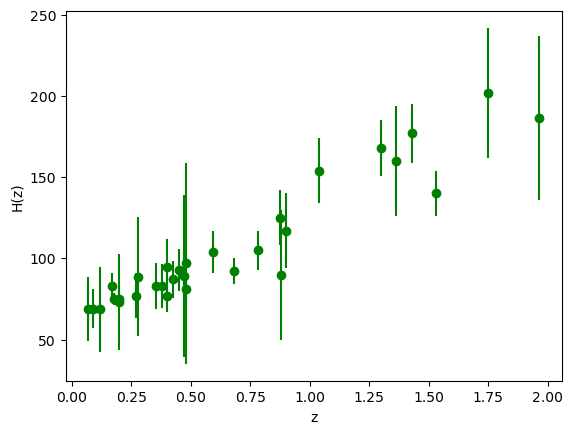

In [2]:
data_file = np.loadtxt('/home/alfonsozapata/SimpleMC/simplemc/data/HDiagramCompilacion-data_31.txt')
cov_1     = np.loadtxt('/home/alfonsozapata/SimpleMC/simplemc/data/HDiagramCompilacion-cov_31.txt')
labs = ['z', 'Hz', 'err']
z_obs = data_file[:,0]
Hz_obs = data_file[:,1]
err = data_file[:,2]

plt.errorbar(z_obs, Hz_obs, err, ls='', marker='o',color='green')
plt.ylabel('H(z)')
plt.xlabel('z')

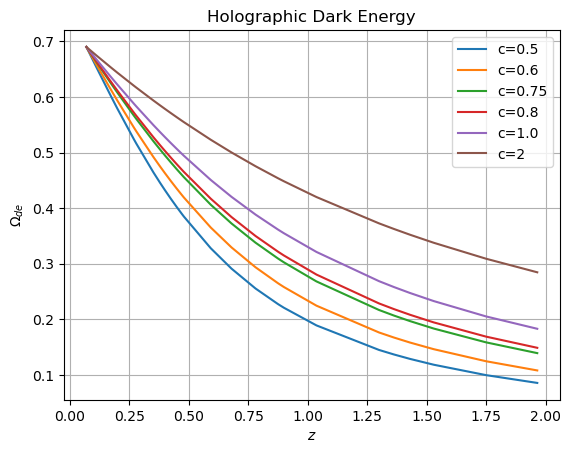

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

c = [0.5, 0.6, 0.75, 0.8, 1.0, 2]
H0 = 70
Om0 = 0.3
Ode_0 = 0.69
zfin = 5
zval = np.linspace(0, 3, 31)
zval11 = np.linspace(0, 3, 31)

def modelz_1(Omega, z, c_value):
    dOdz = -(Omega * (1 - Omega) / (1 + z)) * (1 + 2 * np.sqrt(Omega) / c_value) - Omega * 0.0001 * (z + 1) ** 3
    return dOdz

solutions = []
for c_value in c:
    sol = odeint(modelz_1, Ode_0, z_obs, args=(c_value,))
    solutions.append(sol)

# Reshape all solutions
solution_reshape = []
for sol in solutions:
    solution_reshape.append(sol[:, 0])  
# Plot each component of solutions_tsallis_reshaped against xval
for sol_reshaped, c_value in zip(solution_reshape, c):  # added a loop variable for legend
    plt.plot(z_obs, sol_reshaped, label=f'c={c_value}')  # added label for legend

plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy')
plt.legend()
plt.grid(True)
plt.show()


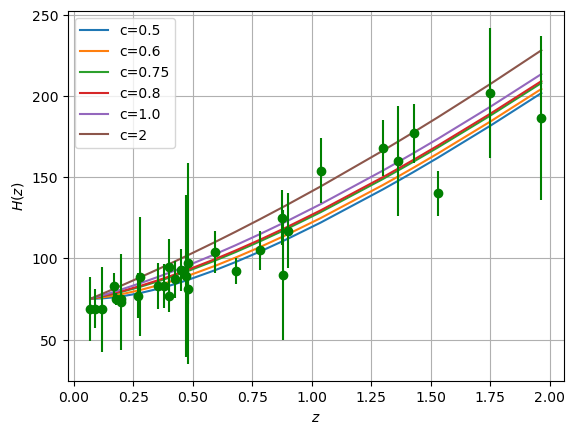

In [32]:
# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 69

def RHSquared_z(z, sol_ode):
    return H0 * np.sqrt((Or * (z + 1) ** 4 + Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z = []
for sol_ode in solution_reshape:
    Hub = RHSquared_z(z_obs, sol_ode)
    Hubble_z.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_z):
    plt.plot(z_obs, Hub, label=f'c={c[i]}')

plt.errorbar(z_obs,Hz_obs, err, ls='', marker='o', color='green')
#plt.plot(, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)

red_z = np.linspace(0, 3, 31)

hubz = hub(z_obs)


In [34]:
H1 = Hubble_z[0].reshape(-1)
H2 = Hubble_z[1].reshape(-1)
H3 = Hubble_z[2].reshape(-1)
H4 = Hubble_z[3].reshape(-1)
H5 = Hubble_z[4].reshape(-1)
H6 = Hubble_z[5].reshape(-1)


In [35]:
chi2_arr1 = np.zeros((len(H1)))

for i in range(len(H1)):
        chi2_arr1[i]=(1/2)*np.dot((Hz_obs-H1[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-H1[i])))

chi2_arr1

array([  77.51179772,   77.37910592,   76.82917893,   75.1060909 ,
         74.70686384,   73.74185458,   73.69106861,   69.74773759,
         69.15307306,   65.07796258,   63.73134477,   62.92383132,
         62.90887185,   62.11278553,   61.55248065,   61.31848374,
         61.28527553,   61.28316317,   65.35593017,   75.45922672,
         96.73066534,  127.2972558 ,  129.24158863,  137.35633393,
        208.33202135,  430.20424416,  502.15652112,  587.36376386,
        731.96321094, 1128.86158074, 1630.93805544])

In [36]:
chi2_arr2 = np.zeros((len(H2)))

for i in range(len(H2)):
        chi2_arr2[i]=(1/2)*np.dot((Hz_obs-H2[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-H2[i])))

chi2_arr3 = np.zeros((len(H3)))
for i in range(len(H3)):
        chi2_arr3[i]=(1/2)*np.dot((Hz_obs-H3[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-H3[i])))

chi2_arr4 = np.zeros((len(H4)))
for i in range(len(H4)):
        chi2_arr4[i]=(1/2)*np.dot((Hz_obs-H4[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-H4[i])))

chi2_arr5 = np.zeros((len(H5)))
for i in range(len(H5)):
        chi2_arr5[i]=(1/2)*np.dot((Hz_obs-H5[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-H5[i])))

chi2_arr6 = np.zeros((len(H6)))
for i in range(len(H6)):
        chi2_arr6[i]=(1/2)*np.dot((Hz_obs-H6[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-H6[i])))




In [37]:
print(np.min(chi2_arr1))
print(np.min(chi2_arr2))
print(np.min(chi2_arr3))
print(np.min(chi2_arr4))
print(np.min(chi2_arr5))
print(np.min(chi2_arr6))


61.28316316905741
61.28960981516198
61.29337140803248
61.300976858782406
61.616184138745766
61.38682301962188


In [38]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)


hubz = hub(z_obs).reshape(-1)


chi2_arr_LCDM = np.zeros((len(hubz)))

for i in range(len(hubz)):
        chi2_arr_LCDM[i]=(1/2)*np.dot((Hz_obs-hubz[i]).T,np.dot(np.linalg.inv(cov_1),(Hz_obs-hubz[i])))

np.min(chi2_arr_LCDM)

61.303271046463244

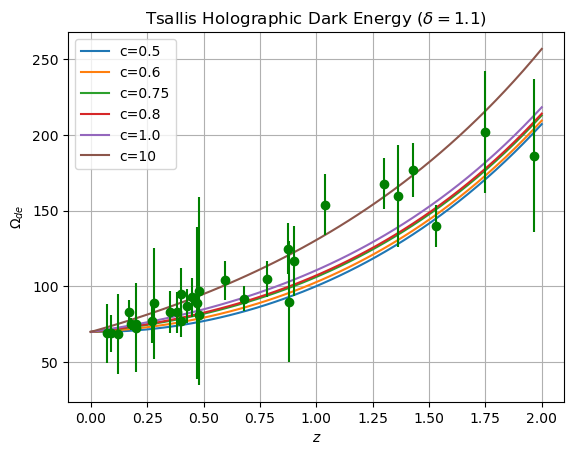

In [11]:


c = [0.5, 0.6, 0.75, 0.8, 1.0, 10]
H0 = 70
Om0 = 0.3
Ode_0 = 0.7
zfin = 2
xfin = np.log(1./(1+zfin))
xini = 0

zval = np.linspace(0, 2, 50)
xval = np.linspace(0,xfin,50)



def modelx_1(Omega,x, c_value):
    dOdx = (Omega * (1 - Omega)) * (1 + 2 * np.sqrt(Omega) / c_value)
    return dOdx

solutions_x = []
for c_value in c:
    solx = odeint(modelx_1, Ode_0, xval, args=(c_value,))
    solutions_x.append(solx)

# Reshape all solutions
solution_reshape_x = []
for solx in solutions_x:
    solution_reshape_x.append(solx[:, 0])  


def RHSquared_x(x, sol_ode):
    return H0 * np.sqrt((Or * (np.exp(-4*x)) + Om * (np.exp(-3*x))) / (1 - sol_ode))

Hubble_x = []
for sol_odex in solution_reshape_x:
    Hub = RHSquared_x(xval, sol_odex)
    Hubble_x.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_x):
    plt.plot(zval, Hub, label=f'c={c[i]}')

plt.errorbar(z_obs,Hz_obs, err, ls='', marker='o', color='green')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($\delta = 1.1$)')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


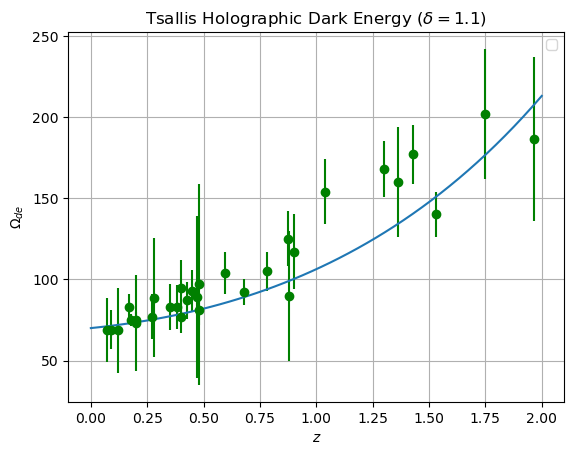

In [12]:


c = [0.5, 0.6, 0.75, 0.8, 1.0, 2]
H0 = 70
Om0 = 0.3
Ode_0 = 0.7
zfin = 2
xfin = np.log(1./(1+zfin))
xini = 0

zval = np.linspace(0, 2, 50)
xval = np.linspace(0,xfin,50)



def modelx_2(Omega,x):
    dOdx = (Omega * (1 - Omega)) * (1 + 2 * np.sqrt(Omega) / 0.75)
    return dOdx



solx = odeint(modelx_2, 0.7,xval)
solx_re = solx.reshape(-1)

def RHSquared_x(x):
    return H0 * np.sqrt((Or * (np.exp(-4*x)) + Om * (np.exp(-3*x))) / (1 - solx_re))


Hux = RHSquared_x(xval)

# Plot each component H(z) for B values
#for i, Hub in enumerate(Hubble_x):
 #   plt.plot(zval, Hub, label=f'c={c[i]}')


plt.errorbar(z_obs,Hz_obs, err, ls='', marker='o', color='green')
plt.plot(zval,Hux)
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($\delta = 1.1$)')
plt.legend()
plt.grid(True)
plt.show()